# Exploratory Data Analysis

When placed in Metapack data package, this notebook will load the package and run a variety of common EDA operations on the first resource. 


In [1]:
import matplotlib.pyplot as plt 
import seaborn as sns
import metapack as mp
import pandas as pd
import numpy as np
from IPython.display import display 

%matplotlib inline
sns.set_context('notebook')


In [2]:
pkg = mp.jupyter.open_package()

# For testing and development
#pkg = mp.open_package('http://s3.amazonaws.com/library.metatab.org/cde.ca.gov-accountability_dashboard-2.zip')

pkg

In [3]:
resource_name='homeless_survey'

In [4]:
pkg.resource(resource_name)

Header,Type,Description
survey_year,string,
birth_year,integer,
age,integer,
gender,string,
sex,string,
ethnicity,string,
race_full,string,
race_recode,string,
raceeth,string,
veteran,integer,


In [5]:
df = pkg.resource(resource_name).read_csv(parse_dates=True)

In [6]:
df.head()

,survey_year,birth_year,age,gender,sex,ethnicity,race_full,race_recode,raceeth,veteran,...,physical_disability,mental_illness,alcohol_abuse,drug_abuse,drug_alcohol_history,hiv_positive,part_time,full_time,unemployed_looking,unemployed_not_looking
0,Unsheltered 2011,1993.0,18.0,Female,F,European American,White,European American,nhwhite,0,...,0,0,0.0,0.0,1,0,0.0,0.0,1.0,0.0
1,Unsheltered 2011,1964.0,46.0,Female,F,African American,Black-African-American,African American,black,0,...,0,1,0.0,0.0,0,0,0.0,0.0,1.0,0.0
2,Unsheltered 2011,1956.0,55.0,Male,M,European American,White,European American,nhwhite,0,...,1,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0
3,Unsheltered 2011,1960.0,50.0,Male,M,European American,White,European American,nhwhite,1,...,0,0,1.0,0.0,1,0,0.0,0.0,1.0,0.0
4,Unsheltered 2011,1979.0,31.0,Male,M,Latino,BLANK,Unknown,hisp,0,...,0,0,0.0,0.0,0,0,0.0,0.0,1.0,0.0


In [7]:
empty_col_names = [cn for cn in df.columns if df[cn].nunique() == 0]
const_col_names= [cn for cn in df.columns if df[cn].nunique() == 1]
ignore_cols = empty_col_names+const_col_names
dt_col_names= list(df.select_dtypes(include=[np.datetime64]).columns)

number_col_names = [ cn for cn in df.select_dtypes(include=[np.number]).columns if cn not in ignore_cols ]
other_col_names = [cn for cn in df.columns if cn not in (empty_col_names+const_col_names+dt_col_names+number_col_names)]

In [8]:
pd.DataFrame.from_dict({'empty':[len(empty_col_names)], 
                        'const':[len(const_col_names)],
                        'datetime':[len(dt_col_names)],
                        'number':[len(number_col_names)],
                        'other':[len(other_col_names)],
                       }, 
                       orient='index', columns=['count'])

,count
empty,0
const,0
datetime,0
number,20
other,10


# Constant Columns

In [9]:
if const_col_names:
    display(df[const_col_names].drop_duplicates().T)

# Empty Columns

In [10]:
if empty_col_names:
    display(df[empty_col_names].drop_duplicates().T)

# Date and Time Columns

In [11]:
if dt_col_names:
    display(df[dt_col_names].info())
    display(df[dt_col_names].describe().T)

# Number Columns

In [12]:
if number_col_names:
    display(df[number_col_names].info())
    display(df[number_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 20 columns):
birth_year                72090 non-null float64
age                       72159 non-null float64
veteran                   73153 non-null int64
chronic_time              73153 non-null int64
chronic_condition         72175 non-null float64
chronic                   72175 non-null float64
adult_with_child          73153 non-null int64
spa                       72990 non-null float64
census_tract              42187 non-null float64
physical_sexual_abuse     59670 non-null float64
physical_disability       73153 non-null int64
mental_illness            73153 non-null int64
alcohol_abuse             58278 non-null float64
drug_abuse                58278 non-null float64
drug_alcohol_history      73153 non-null int64
hiv_positive              73153 non-null int64
part_time                 44981 non-null float64
full_time                 44981 non-null float64
unemployed_looking     

None

,count,mean,std,min,25%,50%,75%,max
birth_year,72090.0,1972.482272,15.949337,1898.0,1960.0,1970.0,1984.0,2017.0
age,72159.0,42.397650,17.467114,0.0,31.0,45.0,54.0,2015.0
veteran,73153.0,0.119025,0.323820,0.0,0.0,0.0,0.0,1.0
chronic_time,73153.0,0.471819,0.499209,0.0,0.0,0.0,1.0,1.0
chronic_condition,72175.0,0.427309,0.494691,0.0,0.0,0.0,1.0,1.0
chronic,72175.0,0.240540,0.427415,0.0,0.0,0.0,0.0,1.0
adult_with_child,73153.0,0.057318,0.232451,0.0,0.0,0.0,0.0,1.0
spa,72990.0,4.487204,1.930982,1.0,3.0,4.0,6.0,8.0
census_tract,42187.0,387555.483869,250761.767976,101110.0,206300.0,239801.0,535102.0,980031.0
physical_sexual_abuse,59670.0,0.157617,0.364384,0.0,0.0,0.0,0.0,1.0


## Distributions

In [13]:
def plot_histograms(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(3*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(3*n_cols,3*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.distplot(df[col_names[i]].dropna(),kde=True) 
            g.set(xticklabels=[])
            g.set(yticklabels=[])
        except:
            pass
        
    plt.tight_layout()
        


/Users/eric/proj/virt/data-project/lib/python3.6/site-packages/scipy/stats/stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


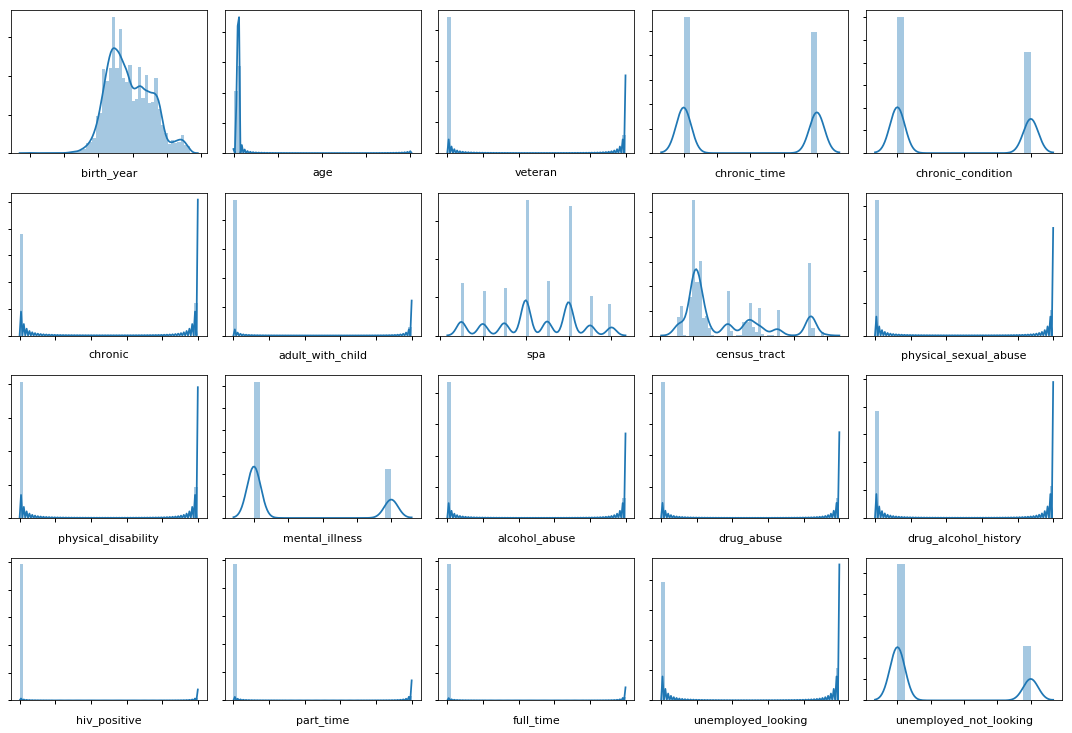

In [14]:
plot_histograms(df[number_col_names])

## Box Plots

In [15]:
def plot_boxes(df):

    col_names = list(df.columns)

    n_cols = np.ceil(np.sqrt(len(col_names)))
    n_rows = np.ceil(np.sqrt(len(col_names)))

    #plt.figure(figsize=(2*n_cols,3*n_rows))
    fig, ax = plt.subplots(figsize=(2*n_cols,5*n_rows))
    
    for i in range(0,len(col_names)):
        plt.subplot(n_rows + 1,n_cols,i+1)
        try:
            g = sns.boxplot(df[col_names[i]].dropna(),orient='v') 
        except:
            pass
        
    plt.tight_layout()
  

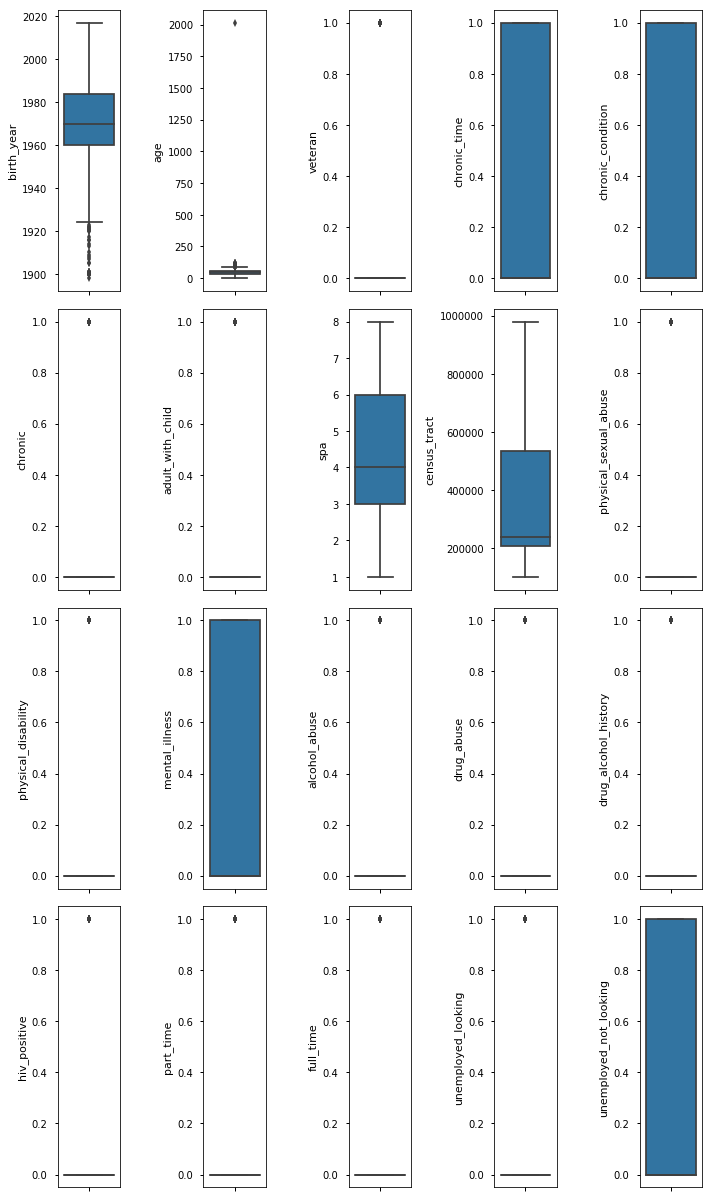

In [16]:
  
plot_boxes(df[number_col_names])

In [17]:
## Correlations

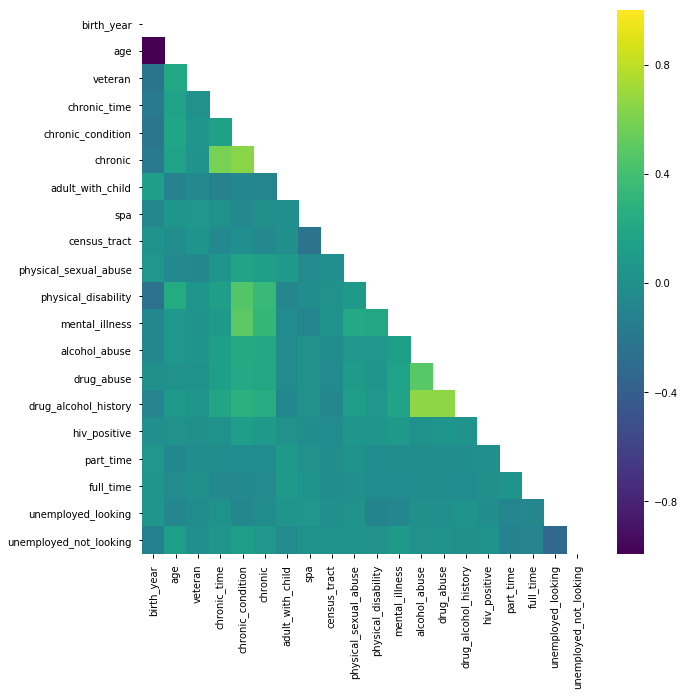

In [18]:

cm = df[number_col_names].corr()

mask = np.zeros_like(cm, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(.5*len(number_col_names),.5*len(number_col_names)))
sns.heatmap(cm, mask=mask, cmap = 'viridis')   

# Other Columns

In [19]:
if other_col_names:
    display(df[other_col_names].info())
    display(df[other_col_names].describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73153 entries, 0 to 73152
Data columns (total 10 columns):
survey_year                 73153 non-null object
gender                      73015 non-null object
sex                         73015 non-null object
ethnicity                   73102 non-null object
race_full                   71980 non-null object
race_recode                 72715 non-null object
raceeth                     73153 non-null object
times_homeless_3yrs         73153 non-null object
times_homeless_past_year    15854 non-null object
current_stint_duration      73152 non-null object
dtypes: object(10)
memory usage: 5.6+ MB


None

,count,unique,top,freq
survey_year,73153,9,Sheltered 2013,14875
gender,73015,4,Male,49117
sex,73015,3,M,49117
ethnicity,73102,5,African American,31900
race_full,71980,133,White,22963
race_recode,72715,4,African American,33016
raceeth,73153,7,black,31880
times_homeless_3yrs,73153,6,1 time,18994
times_homeless_past_year,15854,4,1 time,9835
current_stint_duration,73152,6,12+ months,26739


# Nulls


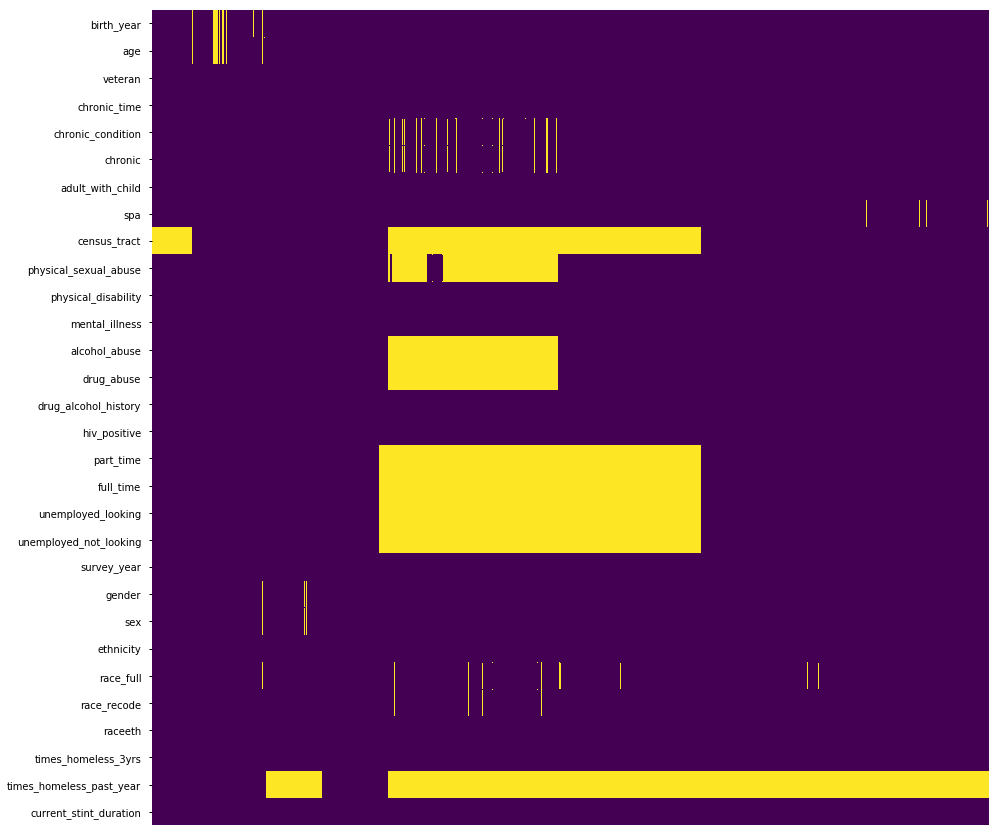

In [20]:
cols = dt_col_names + number_col_names + other_col_names

fig, ax = plt.subplots(figsize=(15,.5*len(cols)))
sns.heatmap(df[cols].isnull().T,cbar=False,xticklabels=False,cmap = 'viridis', ax=ax )